# 最初のパーセプトロンを実践する

In [20]:
import numpy as np

In [21]:
class Perceptron(object):
    def __init__(self, lr=0.01, n_iter=10):
        self.lr = lr
        self.n_iter = n_iter
    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0.0
        for _ in range(self.n_iter):
            for xi, yi in zip(X, y):
                delta = self.lr * (yi - self.predict(xi))
                self.weights += delta * xi
                self.bias += delta
    def predict(self, X):
        return  np.where(np.dot(X, self.weights) + self.bias >= 0.0, 1, -1)
        

In [22]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2, cluster_std=2.2, random_state=42)

In [23]:
y = 2 * y - 1

Text(0, 0.5, 'x2')

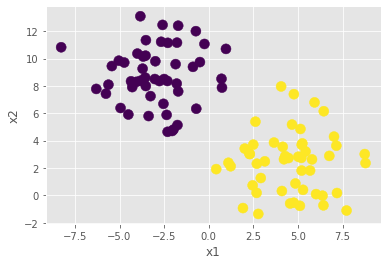

In [24]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.scatter(X[:, 0], X[:, 1], s=100, c=y);
plt.xlabel('x1')
plt.ylabel('x2')

In [25]:
p = Perceptron(lr=0.1, n_iter=10)

In [26]:
p.fit(X, y)

In [27]:
p.weights

array([ 2.20091094, -0.4798926 ])

In [28]:
p.bias

0.2

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(p.predict(X), y)

1.0

In [40]:
def plot_decision_boundary(classifier, X_test, y_test):
    h = 0.02
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    X_hypo = np.c_[xx.ravel().astype(np.float32), yy.ravel().astype(np.float32)]
    zz = classifier.predict(X_hypo)
    zz = zz.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=200)

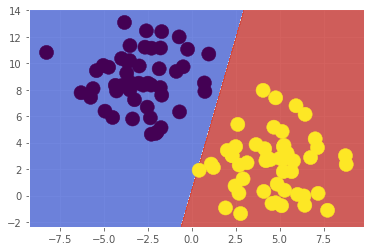

In [41]:
plot_decision_boundary(p, X, y)

# 線形分離できないデータにパーセプトロンを適用する

In [42]:
X, y = make_blobs(n_samples=100, centers=2, cluster_std=5.2, random_state=42)
y = 2 * y - 1

Text(0, 0.5, 'x2')

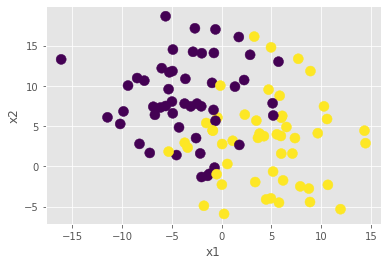

In [44]:
plt.scatter(X[:, 0], X[:, 1], s=100, c=y)
plt.xlabel('x1')
plt.ylabel('x2')

In [46]:
p = Perceptron(lr=1.0, n_iter=10)
p.fit(X, y)
accuracy_score(p.predict(X), y)

0.81

Text(0, 0.5, 'x2')

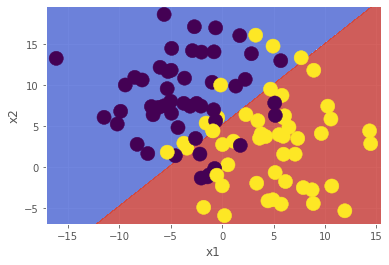

In [48]:
plot_decision_boundary(p, X, y)
plt.xlabel('x1')
plt.ylabel('x2')